# Face It.. We'hv got feelings EDA

In [ ]:
#!pip install tensorflow

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from keras import Sequential, Input, layers


In [2]:
# --- setting environment ------
os.environ['dipaliahirrao'] = "dipaliahirrao"
os.environ['fae34ac4d44d5100b2b2aee4f5630e01'] = "fae34ac4d44d5100b2b2aee4f5630e01"

In [3]:
# --- dataset download

!curl -L -o /content/emotion-detection-fer.zip \
  -u $dipaliahirrao:$fae34ac4d44d5100b2b2aee4f5630e01 \
   https://www.kaggle.com/api/v1/datasets/download/sudarshanvaidya/random-images-for-face-emotion-recognition

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 45.6M  100 45.6M    0     0  17.7M      0  0:00:02  0:00:02 --:--:-- 26.2M


In [4]:
# ----- unzip dataset
!unzip -q /content/emotion-detection-fer.zip -d /content/Face_it_Data

replace /content/Face_it_Data/anger/11647173796_033ff06112_n_face.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/Face_it_Data/anger/1379351899_7cfa2b0dc4_b_face.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [5]:
import os
data_dir = "/content/Face_it_Data"
print("Emotion categories:", os.listdir(data_dir))

Emotion categories: ['anger', 'sadness', 'happiness', 'disgust', 'contempt', 'fear', 'surprise', 'neutrality']


In [6]:
# data_dir = "/home/deepa/code/hannahkiesow/face_it/raw_data/Face_it_Data"

In [7]:
emotions = os.listdir(data_dir)
print("Emotion categories:", emotions)

Emotion categories: ['anger', 'sadness', 'happiness', 'disgust', 'contempt', 'fear', 'surprise', 'neutrality']


In [8]:
extensions = set()

for root, dirs, files in os.walk(data_dir):
    for f in files:
        ext = os.path.splitext(f)[1].lower()
        extensions.add(ext)

print("Available extensions:", extensions)

Available extensions: {'.png'}


In [9]:
folders = [f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))]
counts = []
for folder in folders:
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        images = [f for f in os.listdir(folder_path) if f.endswith('.png')]
        counts.append(len(images))
        print(f"{folder}: {len(images)} images")

anger: 890 images
sadness: 746 images
happiness: 1406 images
disgust: 439 images
contempt: 208 images
fear: 570 images
surprise: 775 images
neutrality: 524 images


In [10]:
def show_images(emotion, n=5):
    folder = os.path.join(data_dir, emotion)
    files = [f for f in os.listdir(folder) if f.endswith('.png')][:n]
    plt.Figure(figsize=(10,10))
    for i, file in enumerate(files):
        img_path = os.path.join(folder, file)
        img = mpimg.imread(img_path)

        plt.subplot(5,5, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(emotion)
        plt.axis("off")
    plt.show()

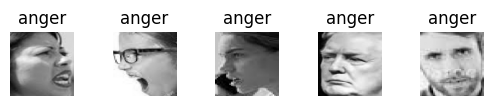

In [11]:
show_images("anger")

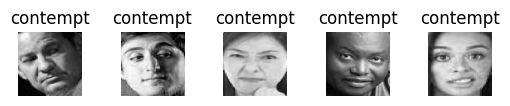

In [12]:
show_images("contempt")

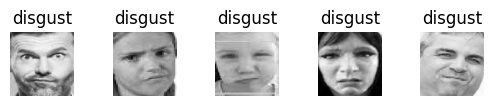

In [13]:
show_images("disgust")

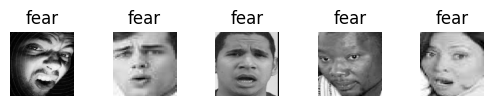

In [14]:
show_images("fear")

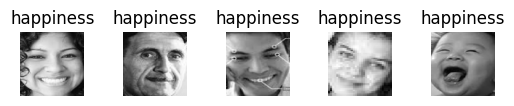

In [15]:
show_images("happiness")

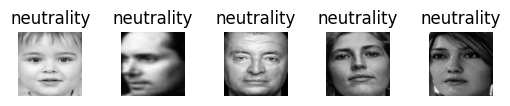

In [16]:
show_images("neutrality")

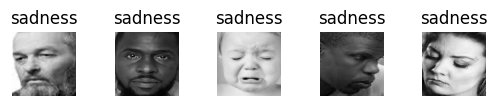

In [17]:
show_images("sadness")

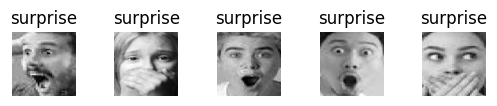

In [18]:
show_images("surprise")

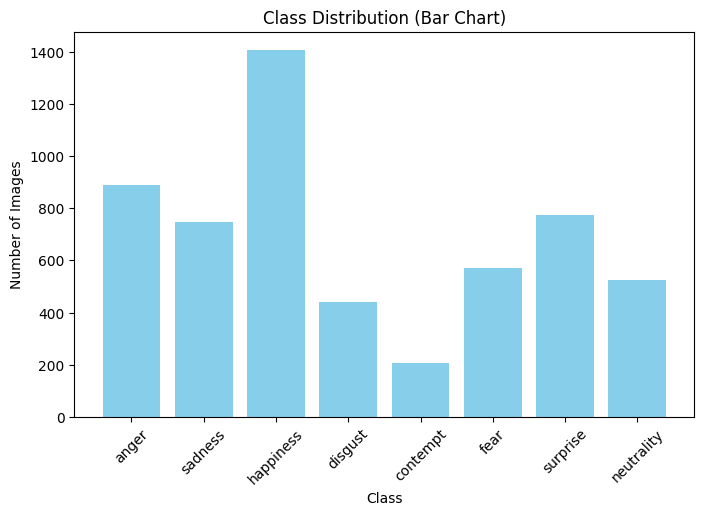

In [19]:
plt.figure(figsize=(8,5))
plt.bar(folders, counts, color="skyblue")
plt.xticks(rotation=45)
plt.title("Class Distribution (Bar Chart)")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

In [20]:
len(folders)

8

In [21]:
data_info = {f: (len([i for i in os.listdir(os.path.join(data_dir,f)) if i.endswith('.png')]),
                 mpimg.imread(os.path.join(data_dir,f,[i for i in os.listdir(os.path.join(data_dir,f))
                 if i.endswith('.png')][0])).shape) for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir,f))}
print(data_info)

{'anger': (890, (224, 224)), 'sadness': (746, (224, 224)), 'happiness': (1406, (224, 224)), 'disgust': (439, (224, 224)), 'contempt': (208, (224, 224)), 'fear': (570, (224, 224)), 'surprise': (775, (224, 224)), 'neutrality': (524, (224, 224))}


### List of unique shapes across all images

In [22]:
unique_shapes = set(mpimg.imread(os.path.join(data_dir,f,i)).shape for f in os.listdir(data_dir)
                    if os.path.isdir(os.path.join(data_dir,f)) for i in os.listdir(os.path.join(data_dir,f)) if i.endswith('.png'))
print(unique_shapes)

{(224, 224)}


In [23]:
total_images = sum(len([i for i in os.listdir(os.path.join(data_dir,f)) if i.endswith('.png')]) for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir,f)))
print(total_images)

5558


In [24]:
avg_shape = {f: (sum(mpimg.imread(os.path.join(data_dir,f,i)).shape[0] for i in os.listdir(os.path.join(data_dir,f)) if i.endswith('.png'))//len([i for i in os.listdir(os.path.join(data_dir,f)) if i.endswith('.png')]),
                 sum(mpimg.imread(os.path.join(data_dir,f,i)).shape[1] for i in os.listdir(os.path.join(data_dir,f)) if i.endswith('.png'))//len([i for i in os.listdir(os.path.join(data_dir,f)) if i.endswith('.png')]))
             for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir,f))}
print(avg_shape)

{'anger': (224, 224), 'sadness': (224, 224), 'happiness': (224, 224), 'disgust': (224, 224), 'contempt': (224, 224), 'fear': (224, 224), 'surprise': (224, 224), 'neutrality': (224, 224)}


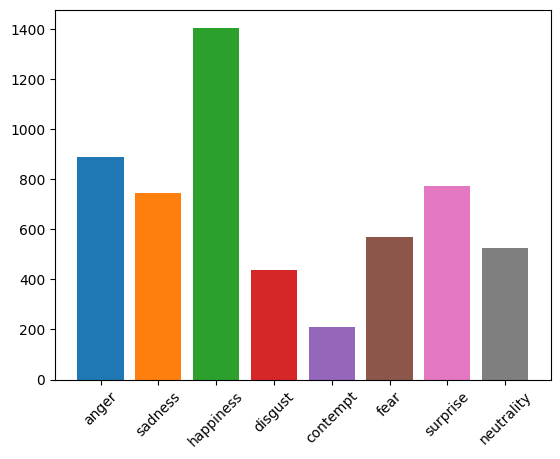

In [25]:
import matplotlib.pyplot as plt
[plt.bar(f, len([i for i in os.listdir(os.path.join(data_dir,f)) if i.endswith('.png')])) for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir,f))]; plt.xticks(rotation=45); plt.show()

In [26]:
sample_image_path = os.path.join(data_dir, "anger", "2Q___face.png")
img = mpimg.imread(sample_image_path)

print(img.shape)

(224, 224)


In [27]:
data_dir = "/content/Face_it_Data"

# Train 70%, Temp 30% (for val+test)
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="training",
    seed=42,
    shuffle=True,
    image_size=(224,224),
    color_mode="grayscale",
    batch_size=32,
    label_mode="categorical"
)

temp_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="validation",
    seed=42,
    shuffle=True,
    image_size=(224,224),
    color_mode="grayscale",
    batch_size=32,
    label_mode="categorical"
)

# Split temp_ds into val and test (50%-50% of temp)
val_size = 0.5
val_ds = temp_ds.take(int(len(temp_ds) * val_size))
test_ds = temp_ds.skip(int(len(temp_ds) * val_size))

Found 5558 files belonging to 8 classes.
Using 3891 files for training.
Found 5558 files belonging to 8 classes.
Using 1667 files for validation.


In [28]:
# Prefetch for performance ----------

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

In [29]:
# Data Augmentation -------------------

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1)
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

In [30]:
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds   = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds  = test_ds.map(lambda x, y: (normalization_layer(x), y))

In [31]:
def initialize_base_emotion_model():

    model = Sequential()
    model.add(Input(shape=(224,224,1)))

    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(32, (3,3), activation="relu", padding="same"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    tf.keras.layers.BatchNormalization(),

    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(64, (3,3), activation="relu", padding="same"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    tf.keras.layers.BatchNormalization(),

    ### Third Convolution & MaxPooling
    model.add(layers.Conv2D(128, (3,3), activation="relu", padding="same"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    tf.keras.layers.BatchNormalization(),

    ### Flattening
    model.add(layers.Flatten())

    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    model.add(layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(layers.Dropout(0.3))

    ### Last layer - Classification Layer with 10 outputs corresponding to 10 digits
    model.add(layers.Dense(8, activation="softmax"))

    ### Model compilation
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                  loss="categorical_crossentropy",
                  metrics=['accuracy'])

    return model

model = initialize_base_emotion_model()

In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,938,888 (49.36 MB)

 Trainable params: 12,938,888 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
from keras.callbacks import EarlyStopping

model = initialize_base_emotion_model()

es = EarlyStopping(
    monitor = 'val_loss',
    patience = 10,
    restore_best_weights=True)


In [34]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    batch_size=32,
    callbacks=[es],
    verbose=1
)

Epoch 1/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 37s 240ms/step - accuracy: 0.1986 - loss: 2.1913 - val_accuracy: 0.2476 - val_loss: 2.0056
Epoch 2/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 24s 194ms/step - accuracy: 0.2553 - loss: 2.0025 - val_accuracy: 0.3125 - val_loss: 1.9353
Epoch 3/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 24s 192ms/step - accuracy: 0.2752 - loss: 1.9555 - val_accuracy: 0.3137 - val_loss: 1.8606
Epoch 4/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 24s 193ms/step - accuracy: 0.2902 - loss: 1.9180 - val_accuracy: 0.3053 - val_loss: 1.8681
Epoch 5/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 25s 199ms/step - accuracy: 0.2984 - loss: 1.8924 - val_accuracy: 0.3353 - val_loss: 1.8163
Epoch 6/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 41s 201ms/step - accuracy: 0.3067 - loss: 1.8788 - val_accuracy: 0.3353 - val_loss: 1.8075
Epoch 7/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 41s 198ms/step - accuracy: 0.3135 - loss: 1.8595 - val_accuracy: 0.3738 - val_loss: 1.7861
Epoch 8/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 25s 202ms/step - accuracy: 0.3348 -

In [35]:
loss, accuracy = model.evaluate(test_ds, verbose=1)

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.4493 - loss: 1.5735


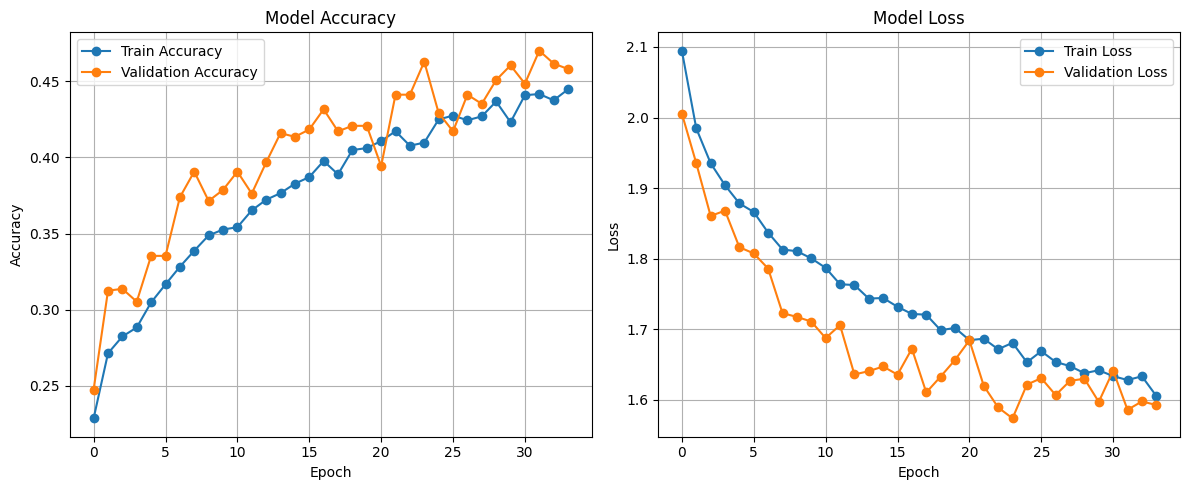

In [36]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()